DL_SEQUENTIOAL_PART 2

In the previous lesson, we made a very simple model and compiled and fitted the model

and now i wanna show you what should we do after fitted the model 

and how predict and evaluet model in keras

In [7]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [8]:
fashin = keras.datasets.fashion_mnist

In [9]:
(xtrain , ytrain) , (xtest , ytest) = fashin.load_data()

In [13]:
xtrain , xtest = xtrain/255.0 , xtest/255.0

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(xtrain, ytrain, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.7630 - accuracy: 0.7494 - val_loss: 0.5382 - val_accuracy: 0.8158
Epoch 2/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.5031 - accuracy: 0.8275 - val_loss: 0.4744 - val_accuracy: 0.8339
Epoch 3/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4548 - accuracy: 0.8396 - val_loss: 0.5226 - val_accuracy: 0.8067
Epoch 4/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4288 - accuracy: 0.8495 - val_loss: 0.4433 - val_accuracy: 0.8438
Epoch 5/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4083 - accuracy: 0.8554 - val_loss: 0.4091 - val_accuracy: 0.8574
Epoch 6/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3932 - accuracy: 0.8611 - val_loss: 0.4146 - val_accuracy: 0.8519
Epoch 7/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3813 - accuracy: 0.8648 - val_loss: 0.3879 - val_accuracy:

I have already shown you up to this point

Let's do someting new :)

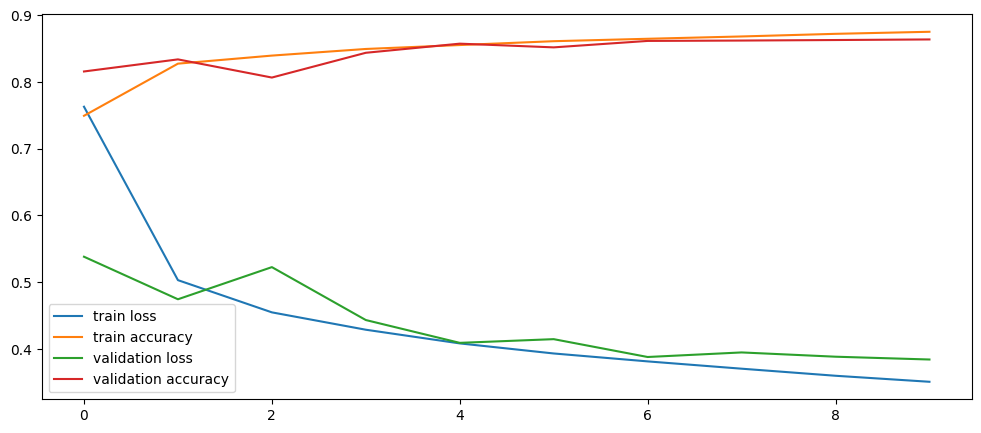

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

may you question what is loss? 
--- ---
The loss function is a method of evaluating how well your machine learning algorithm models your featured data set. In other words, loss functions are a measurement of how good your model is in terms of predicting the expected outcome.

in Classification if the target data is already One-hot encoded , we use **categorical_crossentropy**

in Regression we can use **MSE** or **MAE** or **Huber**

<img src='https://github.com/M-BKH-T/Deep-Learning-Course/blob/main/Book1/Lesson1_%20Sequential/image/mse.jpg?raw=true'>

<img src='https://github.com/M-BKH-T/Deep-Learning-Course/blob/main/Book1/Lesson1_%20Sequential/image/mae.png?raw=true'>

Mean Absolute Error (MAE) is simple to calculate and handles outliers well but is not differentiable at zero.<br> Mean Squared Error (MSE) is sensitive to outliers and penalizes larger errors more due to squaring

I think this amount is enough
Let's get back to our main topic 

its so easy in keras for evaluet and predict the model 

In [20]:
model.evaluate(xtest , ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8558


[0.4014829695224762, 0.8557999730110168]

the first value is loss and second is accuracy 

In [55]:
xpre= xtest[0:100 ,: ,:] # we must creat a data for predict 

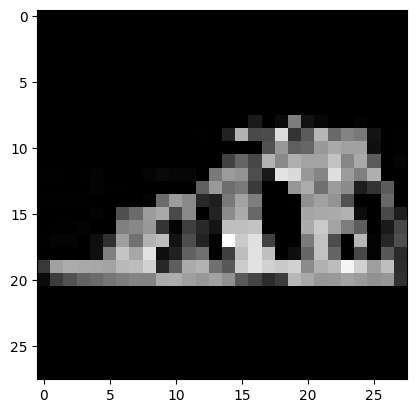

In [57]:
plt.imshow(xpre[11] , cmap="gray")

In [31]:
xpre.shape

(3, 28, 28)

In [58]:
pre=model.predict(xpre[11,:,:])

1/1 [==============================] - 0s 15ms/step


In [60]:
np.argmax(pre , axis=1) # as you see model says its numbet 5 and if we see the fmnist dataset there write num 5 is sandal and its true

array([5], dtype=int64)